In [1]:
import os
import re

import pandas as pd

import numpy as np

from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion

from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import cross_val_predict

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, f1_score, roc_auc_score

import seaborn as sns

from matplotlib import pyplot as plt

from utils_part1 import CreateFeatures, Selector

# Load data and create pipeline

In [2]:
df_train = pd.read_csv('df_train.csv', index_col=0)

In [3]:
X_train = df_train[['text', 'box_0', 'box_1']]
y_train = df_train['label']

In [4]:
pipe_preprocessing = Pipeline([('create_feats', CreateFeatures(text_col='text'))])

In [5]:
pipe_selector = Pipeline([('select_feats', Selector(cols_to_drop=['text']))])

[Multiclass classifiers](https://scikit-learn.org/stable/modules/multiclass.html)

In [6]:
pipe_clf = Pipeline([('clf', ExtraTreesClassifier(n_estimators=25, random_state=0))])

In [7]:
pipe = Pipeline([('create_feats', pipe_preprocessing),
                 ('select_feats', pipe_selector),
                 ('clf', pipe_clf)])

# Cross validation

In [8]:
y_pred = cross_val_predict(pipe, X_train, y_train, cv=5)

In [9]:
len(y_pred)

7411

[Performance metrics](https://scikit-learn.org/stable/modules/model_evaluation.html)

In [10]:
label_order = ['question', 'answer', 'header', 'other']

In [11]:
cf_matrix = confusion_matrix(y_train, y_pred, labels=label_order)
cf_matrix_df = pd.DataFrame(data=cf_matrix, index=label_order, columns=label_order)

In [12]:
#cf_matrix_df

In [13]:
sum_cols = cf_matrix_df.sum(axis=0).rename('cols sum').to_frame().T
sum_rows =cf_matrix_df.sum(axis=1).rename('rows sum').to_frame()
cf_matrix_df_sums = pd.concat([cf_matrix_df, sum_cols]).join(sum_rows)

In [14]:
cf_matrix_df_sums

,question,answer,header,other,rows sum
question,2593,527,73,73,3266.0
answer,639,1950,30,183,2802.0
header,228,84,112,17,441.0
other,218,340,25,319,902.0
cols sum,3678,2901,240,592,NaN


[Confusion matrix](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)

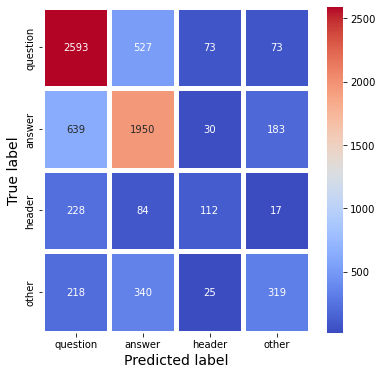

In [15]:
plt.figure(figsize=(6,6))
sns.heatmap(data=cf_matrix_df, annot=True, fmt="d",cmap='coolwarm', linewidths=5)
plt.ylabel('True label', **{'size':'14'})
plt.xlabel('Predicted label', **{'size':'14'})
plt.show()

In [16]:
f1_score(y_train, y_pred, labels=['question', 'answer'], average='weighted')

0.7177491833923566

In [17]:
print(classification_report(y_train, y_pred, labels=label_order))

              precision    recall  f1-score   support

    question       0.71      0.79      0.75      3266
      answer       0.67      0.70      0.68      2802
      header       0.47      0.25      0.33       441
       other       0.54      0.35      0.43       902

    accuracy                           0.67      7411
   macro avg       0.60      0.52      0.55      7411
weighted avg       0.66      0.67      0.66      7411



# Final model

## Fit

Fit the pipeline to the complete training dataset.

In [18]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('create_feats',
                 Pipeline(steps=[('create_feats', CreateFeatures())])),
                ('select_feats',
                 Pipeline(steps=[('select_feats',
                                  Selector(cols_to_drop=['text']))])),
                ('clf',
                 Pipeline(steps=[('clf',
                                  ExtraTreesClassifier(n_estimators=25,
                                                       random_state=0))]))])

## Evaluate final model

In [19]:
df_test = pd.read_csv('df_test.csv', index_col=0)

In [20]:
X_test = df_test[['text', 'box_0', 'box_1']]
y_test = df_test['label']

In [21]:
y_pred_test = pipe.predict(X_test)

C:\Users\jpicao\anaconda3\envs\ml\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname M identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [22]:
y_pred_test

array(['question', 'question', 'question', ..., 'question', 'answer',
       'question'], dtype=object)

In [23]:
len(y_pred_test)

2332

[Performance metrics](https://scikit-learn.org/stable/modules/model_evaluation.html)

In [24]:
label_order = ['question', 'answer', 'header', 'other']

In [25]:
cf_matrix = confusion_matrix(y_test, y_pred_test, labels=label_order)
cf_matrix_df = pd.DataFrame(data=cf_matrix, index=label_order, columns=label_order)

In [26]:
#cf_matrix_df

In [27]:
sum_cols = cf_matrix_df.sum(axis=0).rename('cols sum').to_frame().T
sum_rows =cf_matrix_df.sum(axis=1).rename('rows sum').to_frame()
cf_matrix_df_sums = pd.concat([cf_matrix_df, sum_cols]).join(sum_rows)

In [28]:
cf_matrix_df_sums

,question,answer,header,other,rows sum
question,867,156,13,41,1077.0
answer,194,587,8,32,821.0
header,61,26,28,7,122.0
other,42,119,11,140,312.0
cols sum,1164,888,60,220,NaN


[Confusion matrix](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)

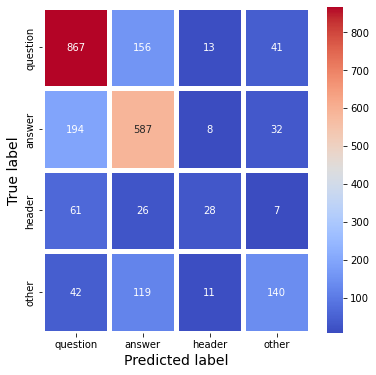

In [29]:
plt.figure(figsize=(6,6))
sns.heatmap(data=cf_matrix_df, annot=True, fmt="d",cmap='coolwarm', linewidths=5)
plt.ylabel('True label', **{'size':'14'})
plt.xlabel('Predicted label', **{'size':'14'})
plt.show()

In [30]:
f1_score(y_test, y_pred_test, labels=['question', 'answer'], average='weighted')

0.7362110076062627

In [31]:
print(classification_report(y_test, y_pred_test, labels=label_order))

              precision    recall  f1-score   support

    question       0.74      0.81      0.77      1077
      answer       0.66      0.71      0.69       821
      header       0.47      0.23      0.31       122
       other       0.64      0.45      0.53       312

    accuracy                           0.70      2332
   macro avg       0.63      0.55      0.57      2332
weighted avg       0.69      0.70      0.69      2332

